In [52]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import rdkit
from rdkit.Chem.RegistrationHash import HashLayer
print(rdkit.__version__)

2023.09.1


In [16]:
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem.MolStandardize.rdMolStandardize import GetV1TautomerEnumerator

In [34]:
def reorderTautomers(m):
    res_multiple = []
    enumerators = [rdMolStandardize.TautomerEnumerator(), rdMolStandardize.GetV1TautomerEnumerator()]
    for enumerator in enumerators:
        canon = enumerator.Canonicalize(m)
        csmi = Chem.MolToSmiles(canon)
        res = [canon]
        tauts = enumerator.Enumerate(m)
        smis = [Chem.MolToSmiles(x) for x in tauts]
        stpl = sorted((x,y) for x,y in zip(smis,tauts) if x!=csmi)
        res += [y for x,y in stpl]
        res_multiple.append(res)
    return res_multiple

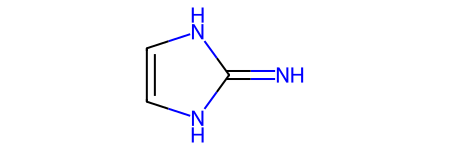

In [49]:
sml = "N=c1[nH]cc[nH]1"
# sml = 'COC1=C2C3=C(CNCC[C@]34C=CC(=O)C[C@@H]4O2)C=C1'
# sml = 'Oc1c(cccc3)c3nc2ccncc12'
# sml = "C1=CC=COC=C1"
m = Chem.MolFromSmiles(sml)
m

In [54]:
m.HashLayer(7)

AttributeError: 'Mol' object has no attribute 'HashLayer'

In [50]:
tauts = reorderTautomers(m)
smls = [[Chem.MolToSmiles(m) for m in row] for row in tauts]

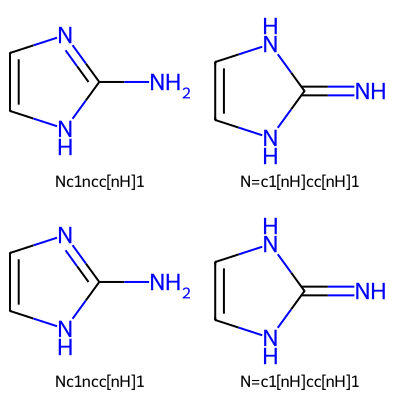

In [51]:
Draw.MolsMatrixToGridImage(tauts, legendsMatrix=smls)